In [13]:
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
# What do I want to acheive from this project

# 1) Who were the passengers on the Titanic? 
# 2) What deck were the passengers on and how does that relate to their class?
# 3) Where did the passengers come from?
# 4) Who was alone and who was with family?

# Bonus - What aided someone to survive the disaster?

In [10]:
titanic = pd.read_csv('train.csv') #Reading CSV file.

In [5]:
titanic.head(20) #Displaying first 20 results within CSV file.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [34]:
titanic.info() #Displaying total of entries within the data for each category/column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Sex', ylabel='count'>

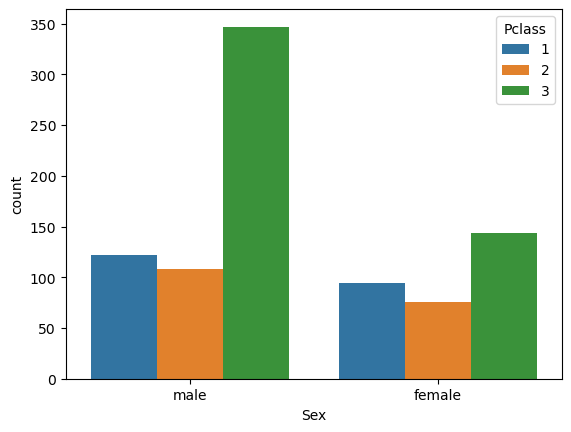

In [38]:
sns.countplot(x="Sex", data=titanic, hue='Pclass') #We want to see the Sex of the passengers, as well as what class they were in. 

<Axes: xlabel='Pclass', ylabel='count'>

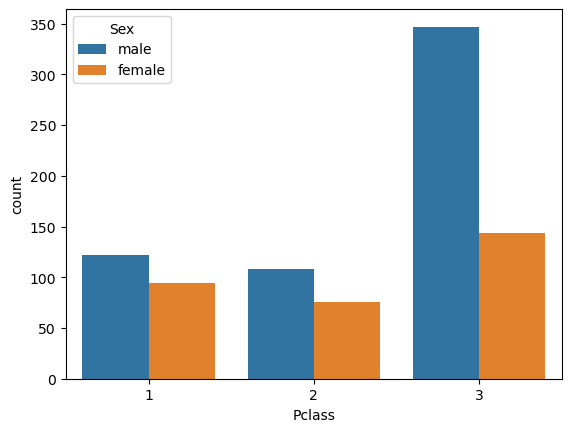

In [39]:
sns.countplot(x="Pclass", data=titanic, hue='Sex') # This graph shows how many Male and Female were sitting in their said classes

In [52]:
def male_female_child(passenger):   # Looking at the age column, if the age is not greater than 16 then that passenger will be listed as a child, if it is greater than they will be listed with their sex.
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [53]:
titanic['person'] = titanic[['Age', 'Sex']].apply(male_female_child, axis=1)

In [36]:
titanic[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


<Axes: xlabel='Pclass', ylabel='count'>

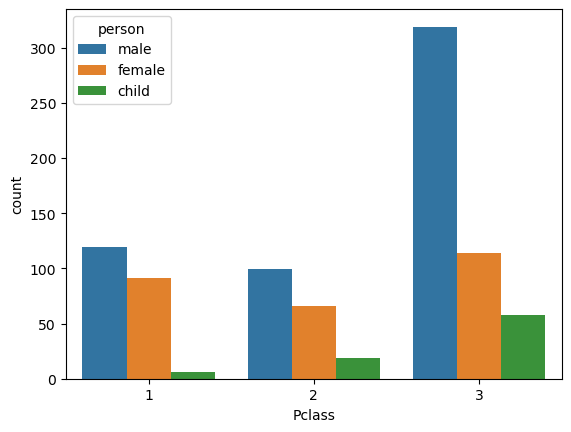

In [40]:
sns.countplot(x="Pclass", data=titanic, hue='person') # The count plot shows, how many male, female and children were sitting in said classes.

<Axes: >

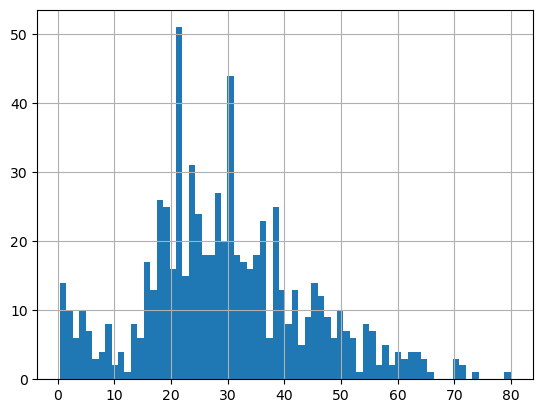

In [41]:
titanic['Age'].hist(bins = 70) # Checking roughly the ages of passengers. 

In [42]:
titanic.Age.mean() # mean of age

29.69911764705882

In [43]:
titanic.person.value_counts() # specific number of how many males, females and children there are 

person
male      537
female    271
child      83
Name: count, dtype: int64

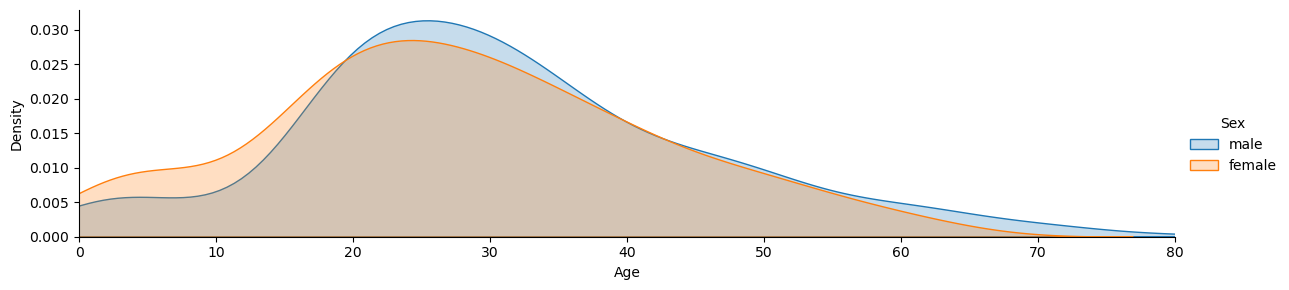

In [9]:
fig = sns.FacetGrid(titanic, hue='Sex', aspect=4) # using FacetGrid to call the CSV file, set the hue to Sex and have the aspect set to 4, to fix the grid better onto my window screen

fig.map(sns.kdeplot, 'Age', fill=True) # mapped the kde plot from the Age column

oldest = titanic['Age'].max() # calling the max value of age from the csv file

fig.set(xlim=(0,oldest)) # the x limit is set from 0 to the oldest.

fig.add_legend() # manually adding a legend

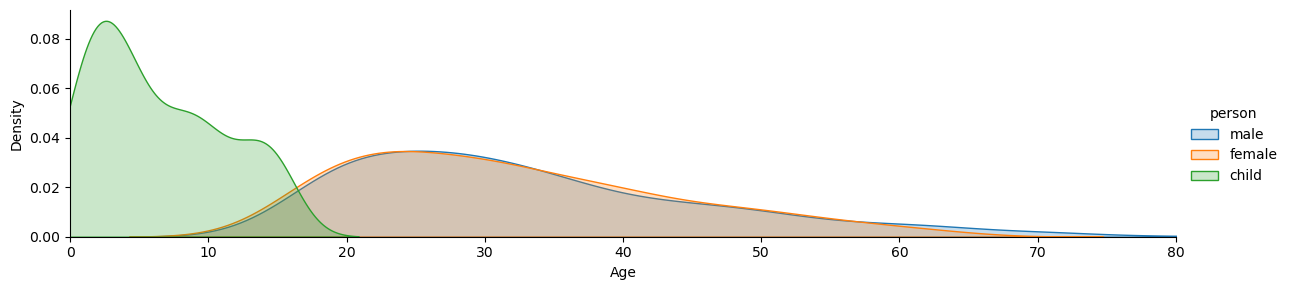

In [13]:
# Same as above but setting the hue to person to see how children are ranged. 

fig = sns.FacetGrid(titanic, hue='person', aspect=4) 

fig.map(sns.kdeplot, 'Age', fill=True) 

oldest = titanic['Age'].max()

fig.set(xlim=(0,oldest)) 

fig.add_legend() 

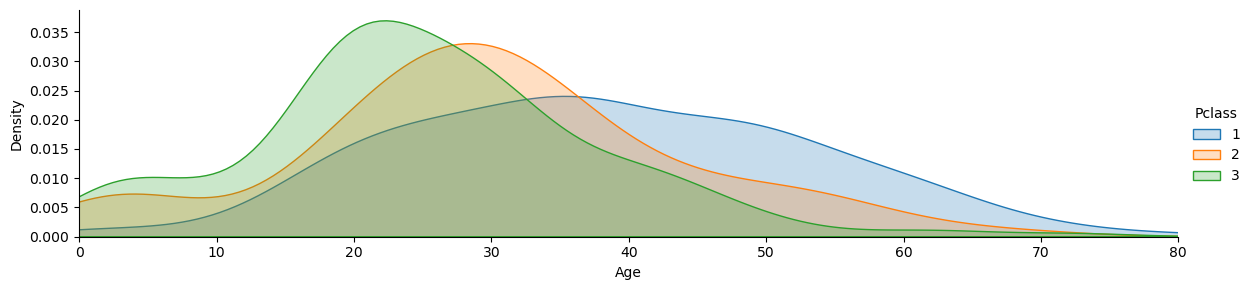

In [14]:
# Same as above but setting the hue to Pclass to see how classes are ranged. 

fig = sns.FacetGrid(titanic, hue='Pclass', aspect=4) 

fig.map(sns.kdeplot, 'Age', fill=True) 

oldest = titanic['Age'].max()

fig.set(xlim=(0,oldest)) 

fig.add_legend() 

In [75]:
deck = titanic['Cabin'].dropna() # dropping null values within the Cabin column

deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

<Axes: xlabel='Cabin', ylabel='count'>

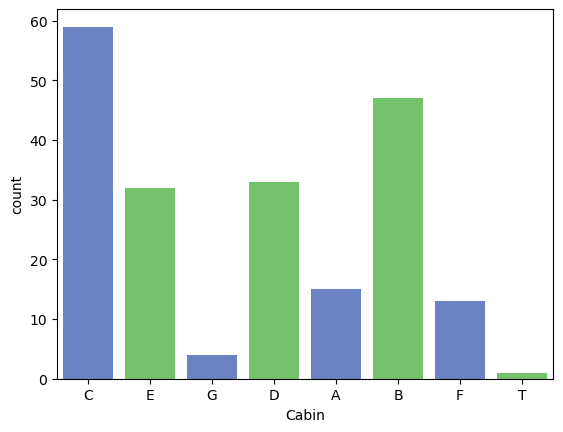

In [31]:
levels = [] # Created an empty list

for level in deck: # for every level in deck, grab the first item within the list and append to the level list. 
    levels.append(level[0])
    
    
cabin_df = DataFrame(levels) # Created a DataFrame from the empty list

cabin_df.columns = ['Cabin'] # Set column equal to Cabin

sns.countplot(x='Cabin', data=cabin_df, palette=['#5c7dd1',"#68d15c"])# Plot out the results

<Axes: xlabel='Cabin', ylabel='count'>

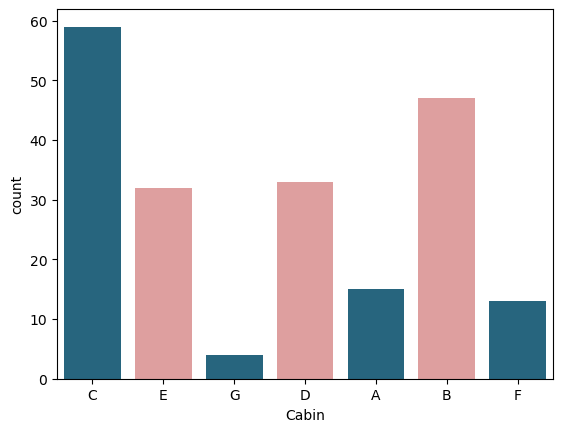

In [34]:
cabin_df = cabin_df[cabin_df.Cabin != 'T'] # Dropping the value T

sns.countplot(x='Cabin', data=cabin_df, palette=['#186b8c',"#e89595"])

In [35]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<Axes: xlabel='Embarked', ylabel='count'>

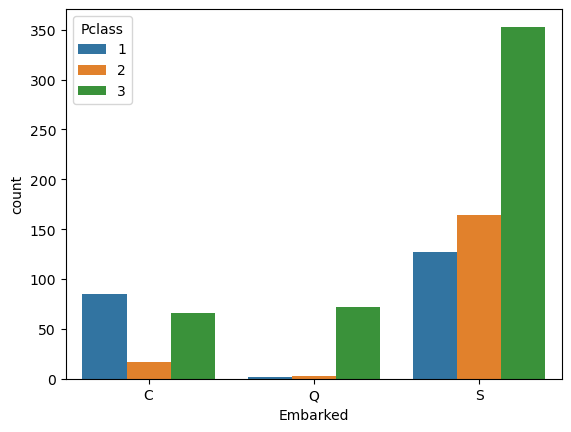

In [37]:
sns.countplot(x='Embarked', data=titanic, hue='Pclass', order=['C','Q','S']) # Displaying which town sat in which class. We can use this to assume the towns economy status at the time. 

In [38]:
titanic['Alone'] = titanic.SibSp + titanic.Parch

titanic['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [39]:
titanic['Alone'].loc[titanic['Alone'] >0] = 'With Family'

titanic['Alone'].loc[titanic['Alone'] == 0] = 'Alone'

C:\Users\Niko\AppData\Local\Temp\ipykernel_4404\1485341918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Alone'].loc[titanic['Alone'] >0] = 'With Family'


In [41]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,With Family


<Axes: xlabel='Alone', ylabel='count'>

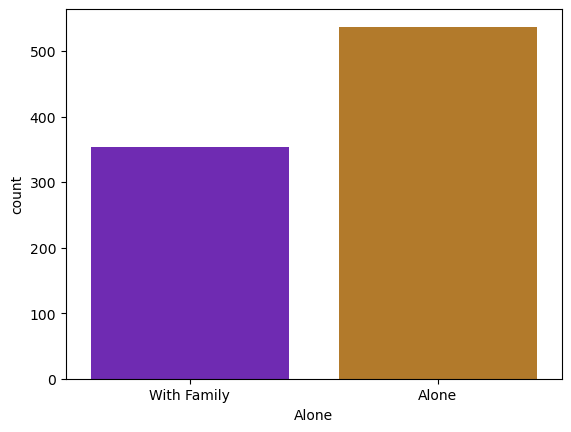

In [43]:
sns.countplot(x='Alone', data=titanic, palette=['#6f14c9',"#c97e14"]) #Which passenger came with someone/family and which came alone

<Axes: xlabel='Survivor', ylabel='count'>

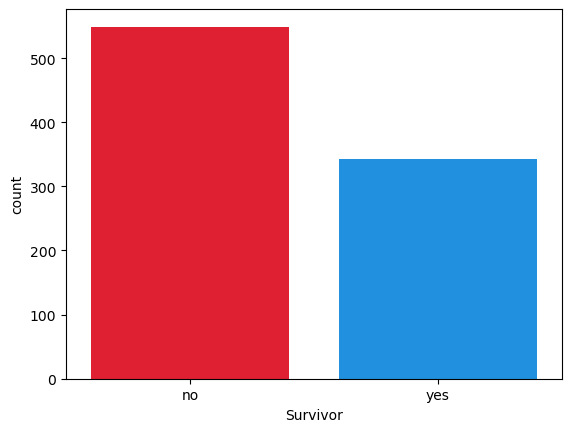

In [45]:
titanic['Survivor'] = titanic.Survived.map({0: 'no', 1: 'yes'}) # Mapping the Survived column 

sns.countplot(x='Survivor', data=titanic, palette=['#ff0019','#0095ff']) #plotting the map

<Axes: xlabel='Pclass', ylabel='Survived'>

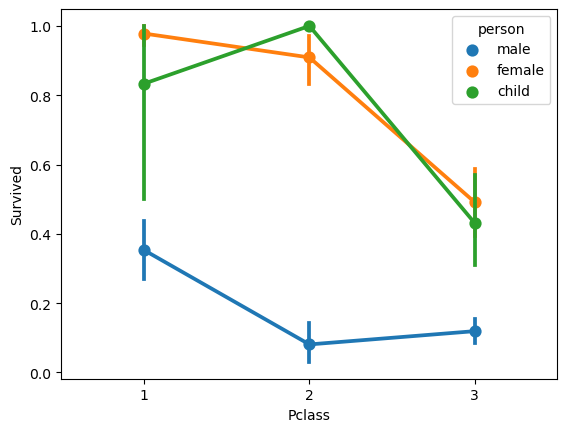

In [55]:
sns.pointplot(x='Pclass', y='Survived', data=titanic, hue='person')  # Displaying which passenger in a certain class survived and whether they were female, male or a child

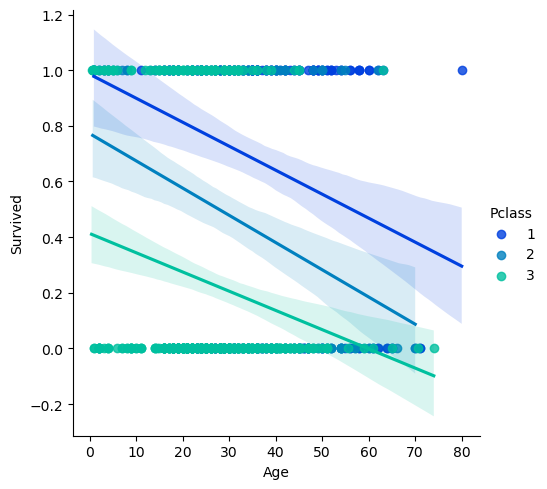

In [58]:
sns.lmplot(x='Age', y='Survived', data=titanic, hue='Pclass', palette='winter') # Age and survival rate

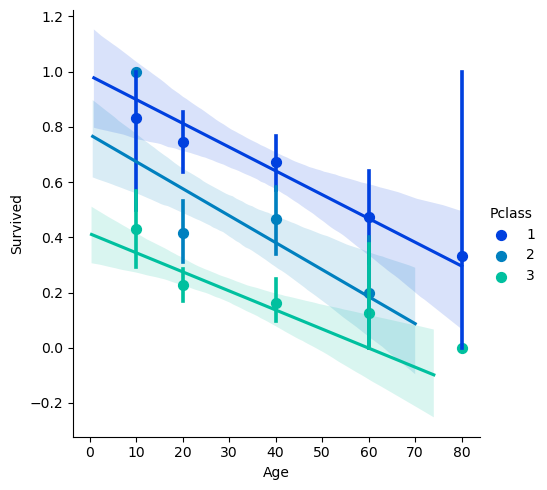

In [59]:
generations = [10, 20, 40, 60, 80]

sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic, palette='winter', x_bins=generations) # Generations of age and their survival rate, as well as what class they were sitting it. 

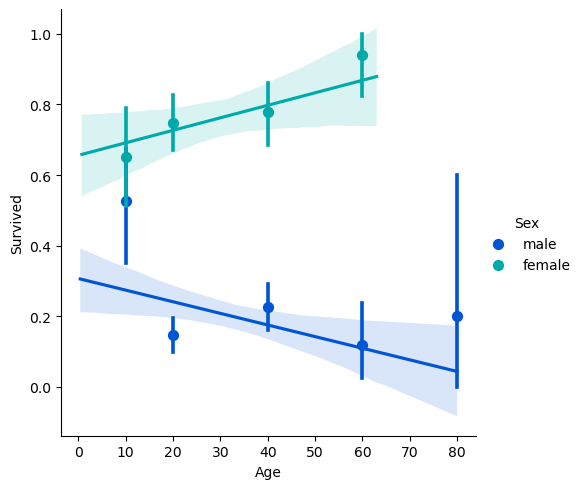

In [60]:
sns.lmplot(x='Age', y='Survived', hue='Sex', data=titanic, palette='winter', x_bins=generations) # Same as above but instead of looking at class we are looking at the Sex